In [1]:
import numpy as np
import os
import sys
import psutil
import nibabel as nib
from time import time
import json
import matplotlib.pyplot as plt
from contextlib import contextmanager
import warnings
warnings.filterwarnings("ignore")

from shutil import copyfile
import platform
if platform.system() != 'Windows':
    sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
    import ants

In [2]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib

import matplotlib
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d as interp1d

In [3]:
save_directory = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_311/analysis" #WHERE TO SAVE
warp_directory = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_311/warp" #LOCATION OF WARP FILES

moving_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_311/func_0/moco'
moving_fly = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_311'
moving_resolution = (2.611, 2.611, 5, 1)

In [4]:
fixed = brainsss.load_fda_meanbrain()

In [5]:
fixed

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (314, 146, 91)
	 Spacing    : (2.0, 2.0, 2.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

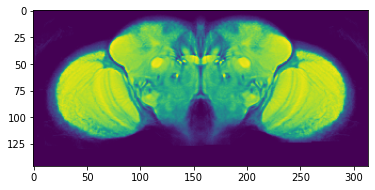

In [6]:
plt.imshow(fixed[:,:,21].T)

In [7]:
neural_file = os.path.join(moving_path, 'functional_channel_2_moco.h5') #
with h5py.File(neural_file, 'r') as h:
    print(h['data'].shape)
    neural = h['data'][:]
moving = ants.from_numpy(neural)
moving.set_spacing(moving_resolution)

(256, 128, 49, 3384)


In [7]:
moving

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 128, 49, 3384)
	 Spacing    : (2.611, 2.611, 5.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]

In [8]:
moving

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 128, 49, 3384)
	 Spacing    : (2.611, 2.611, 5.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]

In [8]:
###########################
### Organize Transforms ###
###########################

dataset_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset'
fly = 'fly_311'
warp_directory = os.path.join(dataset_path, fly, 'warp')
warp_sub_dir = 'func-to-anat_fwdtransforms_2umiso'
affine_file = os.listdir(os.path.join(warp_directory, warp_sub_dir))[0]
affine_path = os.path.join(warp_directory, warp_sub_dir, affine_file)
warp_sub_dir = 'anat-to-meanbrain_fwdtransforms_2umiso'
syn_files = os.listdir(os.path.join(warp_directory, warp_sub_dir))
syn_linear_path = os.path.join(warp_directory, warp_sub_dir, [x for x in syn_files if '.mat' in x][0])
syn_nonlinear_path = os.path.join(warp_directory, warp_sub_dir, [x for x in syn_files if '.nii.gz' in x][0])
transforms = [syn_nonlinear_path, syn_linear_path, affine_path] ### INVERTED ORDER ON
# affine_path, func2anat

In [9]:
print("ready")

ready


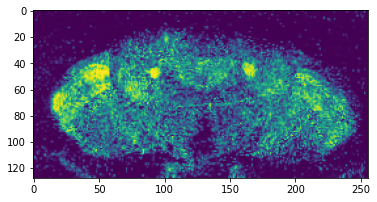

In [10]:
plt.imshow(moving[:,:,20,0].T)

In [11]:
# ########################
# ### Apply Transforms ###
# ########################
# moco = ants.apply_transforms(fixed, moving, transforms, imagetype=3)

In [12]:
# Assuming 'moving_4D' is your loaded 4D image with shape (256, 128, 49, 3384)

# List to store processed volumes
processed_volumes = []

# Loop over each volume and apply transformations
for n in range(3384):
    print(f"Starting processing for volume {n + 1} out of 3384...")
    
    moving_1vol = moving[:,:,:,n]
    moving_1vol = ants.from_numpy(moving_1vol)
    moving_1vol.set_spacing((2.611, 2.611, 5))
    
    moco_vol = ants.apply_transforms(fixed, moving_1vol, transforms)
    print(f"Volume {n + 1}: Transforms applied")
    processed_volumes.append(moco_vol.numpy())
    print(f"Volume {n + 1}: Added to processed volumes list")

# Stitch the processed volumes back together
processed_image_array = np.stack(processed_volumes, axis=3)
print("All volumes processed and stitched together")


# moving_1vol = moving[:,:,:,0]
# moving_1vol = ants.from_numpy(moving_1vol)
# moving_1vol.set_spacing((2.611, 2.611, 5))
# moving_1vol
# ########################
# ### Apply Transforms ###
# ########################
# #quick 1 vol test
# moco = ants.apply_transforms(fixed, moving_1vol, transforms)




Starting processing for volume 1 out of 3384...
Volume 1: Transforms applied
Volume 1: Added to processed volumes list
Starting processing for volume 2 out of 3384...
Volume 2: Transforms applied
Volume 2: Added to processed volumes list
Starting processing for volume 3 out of 3384...
Volume 3: Transforms applied
Volume 3: Added to processed volumes list
Starting processing for volume 4 out of 3384...
Volume 4: Transforms applied
Volume 4: Added to processed volumes list
Starting processing for volume 5 out of 3384...
Volume 5: Transforms applied
Volume 5: Added to processed volumes list
Starting processing for volume 6 out of 3384...
Volume 6: Transforms applied
Volume 6: Added to processed volumes list
Starting processing for volume 7 out of 3384...
Volume 7: Transforms applied
Volume 7: Added to processed volumes list
Starting processing for volume 8 out of 3384...
Volume 8: Transforms applied
Volume 8: Added to processed volumes list
Starting processing for volume 9 out of 3384...


Volume 68: Transforms applied
Volume 68: Added to processed volumes list
Starting processing for volume 69 out of 3384...
Volume 69: Transforms applied
Volume 69: Added to processed volumes list
Starting processing for volume 70 out of 3384...
Volume 70: Transforms applied
Volume 70: Added to processed volumes list
Starting processing for volume 71 out of 3384...
Volume 71: Transforms applied
Volume 71: Added to processed volumes list
Starting processing for volume 72 out of 3384...
Volume 72: Transforms applied
Volume 72: Added to processed volumes list
Starting processing for volume 73 out of 3384...
Volume 73: Transforms applied
Volume 73: Added to processed volumes list
Starting processing for volume 74 out of 3384...
Volume 74: Transforms applied
Volume 74: Added to processed volumes list
Starting processing for volume 75 out of 3384...
Volume 75: Transforms applied
Volume 75: Added to processed volumes list
Starting processing for volume 76 out of 3384...
Volume 76: Transforms ap

Volume 135: Transforms applied
Volume 135: Added to processed volumes list
Starting processing for volume 136 out of 3384...
Volume 136: Transforms applied
Volume 136: Added to processed volumes list
Starting processing for volume 137 out of 3384...
Volume 137: Transforms applied
Volume 137: Added to processed volumes list
Starting processing for volume 138 out of 3384...
Volume 138: Transforms applied
Volume 138: Added to processed volumes list
Starting processing for volume 139 out of 3384...
Volume 139: Transforms applied
Volume 139: Added to processed volumes list
Starting processing for volume 140 out of 3384...
Volume 140: Transforms applied
Volume 140: Added to processed volumes list
Starting processing for volume 141 out of 3384...
Volume 141: Transforms applied
Volume 141: Added to processed volumes list
Starting processing for volume 142 out of 3384...
Volume 142: Transforms applied
Volume 142: Added to processed volumes list
Starting processing for volume 143 out of 3384...


Volume 201: Transforms applied
Volume 201: Added to processed volumes list
Starting processing for volume 202 out of 3384...
Volume 202: Transforms applied
Volume 202: Added to processed volumes list
Starting processing for volume 203 out of 3384...
Volume 203: Transforms applied
Volume 203: Added to processed volumes list
Starting processing for volume 204 out of 3384...
Volume 204: Transforms applied
Volume 204: Added to processed volumes list
Starting processing for volume 205 out of 3384...
Volume 205: Transforms applied
Volume 205: Added to processed volumes list
Starting processing for volume 206 out of 3384...
Volume 206: Transforms applied
Volume 206: Added to processed volumes list
Starting processing for volume 207 out of 3384...
Volume 207: Transforms applied
Volume 207: Added to processed volumes list
Starting processing for volume 208 out of 3384...
Volume 208: Transforms applied
Volume 208: Added to processed volumes list
Starting processing for volume 209 out of 3384...


Volume 267: Transforms applied
Volume 267: Added to processed volumes list
Starting processing for volume 268 out of 3384...
Volume 268: Transforms applied
Volume 268: Added to processed volumes list
Starting processing for volume 269 out of 3384...
Volume 269: Transforms applied
Volume 269: Added to processed volumes list
Starting processing for volume 270 out of 3384...
Volume 270: Transforms applied
Volume 270: Added to processed volumes list
Starting processing for volume 271 out of 3384...
Volume 271: Transforms applied
Volume 271: Added to processed volumes list
Starting processing for volume 272 out of 3384...
Volume 272: Transforms applied
Volume 272: Added to processed volumes list
Starting processing for volume 273 out of 3384...
Volume 273: Transforms applied
Volume 273: Added to processed volumes list
Starting processing for volume 274 out of 3384...
Volume 274: Transforms applied
Volume 274: Added to processed volumes list
Starting processing for volume 275 out of 3384...


Volume 333: Transforms applied
Volume 333: Added to processed volumes list
Starting processing for volume 334 out of 3384...
Volume 334: Transforms applied
Volume 334: Added to processed volumes list
Starting processing for volume 335 out of 3384...
Volume 335: Transforms applied
Volume 335: Added to processed volumes list
Starting processing for volume 336 out of 3384...
Volume 336: Transforms applied
Volume 336: Added to processed volumes list
Starting processing for volume 337 out of 3384...
Volume 337: Transforms applied
Volume 337: Added to processed volumes list
Starting processing for volume 338 out of 3384...
Volume 338: Transforms applied
Volume 338: Added to processed volumes list
Starting processing for volume 339 out of 3384...
Volume 339: Transforms applied
Volume 339: Added to processed volumes list
Starting processing for volume 340 out of 3384...
Volume 340: Transforms applied
Volume 340: Added to processed volumes list
Starting processing for volume 341 out of 3384...


Volume 399: Transforms applied
Volume 399: Added to processed volumes list
Starting processing for volume 400 out of 3384...
Volume 400: Transforms applied
Volume 400: Added to processed volumes list
Starting processing for volume 401 out of 3384...
Volume 401: Transforms applied
Volume 401: Added to processed volumes list
Starting processing for volume 402 out of 3384...
Volume 402: Transforms applied
Volume 402: Added to processed volumes list
Starting processing for volume 403 out of 3384...
Volume 403: Transforms applied
Volume 403: Added to processed volumes list
Starting processing for volume 404 out of 3384...
Volume 404: Transforms applied
Volume 404: Added to processed volumes list
Starting processing for volume 405 out of 3384...
Volume 405: Transforms applied
Volume 405: Added to processed volumes list
Starting processing for volume 406 out of 3384...
Volume 406: Transforms applied
Volume 406: Added to processed volumes list
Starting processing for volume 407 out of 3384...


Volume 465: Transforms applied
Volume 465: Added to processed volumes list
Starting processing for volume 466 out of 3384...
Volume 466: Transforms applied
Volume 466: Added to processed volumes list
Starting processing for volume 467 out of 3384...
Volume 467: Transforms applied
Volume 467: Added to processed volumes list
Starting processing for volume 468 out of 3384...
Volume 468: Transforms applied
Volume 468: Added to processed volumes list
Starting processing for volume 469 out of 3384...
Volume 469: Transforms applied
Volume 469: Added to processed volumes list
Starting processing for volume 470 out of 3384...
Volume 470: Transforms applied
Volume 470: Added to processed volumes list
Starting processing for volume 471 out of 3384...
Volume 471: Transforms applied
Volume 471: Added to processed volumes list
Starting processing for volume 472 out of 3384...
Volume 472: Transforms applied
Volume 472: Added to processed volumes list
Starting processing for volume 473 out of 3384...


Volume 531: Transforms applied
Volume 531: Added to processed volumes list
Starting processing for volume 532 out of 3384...
Volume 532: Transforms applied
Volume 532: Added to processed volumes list
Starting processing for volume 533 out of 3384...
Volume 533: Transforms applied
Volume 533: Added to processed volumes list
Starting processing for volume 534 out of 3384...
Volume 534: Transforms applied
Volume 534: Added to processed volumes list
Starting processing for volume 535 out of 3384...
Volume 535: Transforms applied
Volume 535: Added to processed volumes list
Starting processing for volume 536 out of 3384...
Volume 536: Transforms applied
Volume 536: Added to processed volumes list
Starting processing for volume 537 out of 3384...
Volume 537: Transforms applied
Volume 537: Added to processed volumes list
Starting processing for volume 538 out of 3384...
Volume 538: Transforms applied
Volume 538: Added to processed volumes list
Starting processing for volume 539 out of 3384...


Volume 597: Transforms applied
Volume 597: Added to processed volumes list
Starting processing for volume 598 out of 3384...
Volume 598: Transforms applied
Volume 598: Added to processed volumes list
Starting processing for volume 599 out of 3384...
Volume 599: Transforms applied
Volume 599: Added to processed volumes list
Starting processing for volume 600 out of 3384...
Volume 600: Transforms applied
Volume 600: Added to processed volumes list
Starting processing for volume 601 out of 3384...
Volume 601: Transforms applied
Volume 601: Added to processed volumes list
Starting processing for volume 602 out of 3384...
Volume 602: Transforms applied
Volume 602: Added to processed volumes list
Starting processing for volume 603 out of 3384...
Volume 603: Transforms applied
Volume 603: Added to processed volumes list
Starting processing for volume 604 out of 3384...
Volume 604: Transforms applied
Volume 604: Added to processed volumes list
Starting processing for volume 605 out of 3384...


Volume 663: Transforms applied
Volume 663: Added to processed volumes list
Starting processing for volume 664 out of 3384...
Volume 664: Transforms applied
Volume 664: Added to processed volumes list
Starting processing for volume 665 out of 3384...
Volume 665: Transforms applied
Volume 665: Added to processed volumes list
Starting processing for volume 666 out of 3384...
Volume 666: Transforms applied
Volume 666: Added to processed volumes list
Starting processing for volume 667 out of 3384...
Volume 667: Transforms applied
Volume 667: Added to processed volumes list
Starting processing for volume 668 out of 3384...
Volume 668: Transforms applied
Volume 668: Added to processed volumes list
Starting processing for volume 669 out of 3384...
Volume 669: Transforms applied
Volume 669: Added to processed volumes list
Starting processing for volume 670 out of 3384...
Volume 670: Transforms applied
Volume 670: Added to processed volumes list
Starting processing for volume 671 out of 3384...


Volume 729: Transforms applied
Volume 729: Added to processed volumes list
Starting processing for volume 730 out of 3384...
Volume 730: Transforms applied
Volume 730: Added to processed volumes list
Starting processing for volume 731 out of 3384...
Volume 731: Transforms applied
Volume 731: Added to processed volumes list
Starting processing for volume 732 out of 3384...
Volume 732: Transforms applied
Volume 732: Added to processed volumes list
Starting processing for volume 733 out of 3384...
Volume 733: Transforms applied
Volume 733: Added to processed volumes list
Starting processing for volume 734 out of 3384...
Volume 734: Transforms applied
Volume 734: Added to processed volumes list
Starting processing for volume 735 out of 3384...
Volume 735: Transforms applied
Volume 735: Added to processed volumes list
Starting processing for volume 736 out of 3384...
Volume 736: Transforms applied
Volume 736: Added to processed volumes list
Starting processing for volume 737 out of 3384...


Volume 795: Transforms applied
Volume 795: Added to processed volumes list
Starting processing for volume 796 out of 3384...
Volume 796: Transforms applied
Volume 796: Added to processed volumes list
Starting processing for volume 797 out of 3384...
Volume 797: Transforms applied
Volume 797: Added to processed volumes list
Starting processing for volume 798 out of 3384...
Volume 798: Transforms applied
Volume 798: Added to processed volumes list
Starting processing for volume 799 out of 3384...
Volume 799: Transforms applied
Volume 799: Added to processed volumes list
Starting processing for volume 800 out of 3384...
Volume 800: Transforms applied
Volume 800: Added to processed volumes list
Starting processing for volume 801 out of 3384...
Volume 801: Transforms applied
Volume 801: Added to processed volumes list
Starting processing for volume 802 out of 3384...
Volume 802: Transforms applied
Volume 802: Added to processed volumes list
Starting processing for volume 803 out of 3384...


Volume 861: Transforms applied
Volume 861: Added to processed volumes list
Starting processing for volume 862 out of 3384...
Volume 862: Transforms applied
Volume 862: Added to processed volumes list
Starting processing for volume 863 out of 3384...
Volume 863: Transforms applied
Volume 863: Added to processed volumes list
Starting processing for volume 864 out of 3384...
Volume 864: Transforms applied
Volume 864: Added to processed volumes list
Starting processing for volume 865 out of 3384...
Volume 865: Transforms applied
Volume 865: Added to processed volumes list
Starting processing for volume 866 out of 3384...
Volume 866: Transforms applied
Volume 866: Added to processed volumes list
Starting processing for volume 867 out of 3384...
Volume 867: Transforms applied
Volume 867: Added to processed volumes list
Starting processing for volume 868 out of 3384...
Volume 868: Transforms applied
Volume 868: Added to processed volumes list
Starting processing for volume 869 out of 3384...


Volume 927: Transforms applied
Volume 927: Added to processed volumes list
Starting processing for volume 928 out of 3384...
Volume 928: Transforms applied
Volume 928: Added to processed volumes list
Starting processing for volume 929 out of 3384...
Volume 929: Transforms applied
Volume 929: Added to processed volumes list
Starting processing for volume 930 out of 3384...
Volume 930: Transforms applied
Volume 930: Added to processed volumes list
Starting processing for volume 931 out of 3384...
Volume 931: Transforms applied
Volume 931: Added to processed volumes list
Starting processing for volume 932 out of 3384...
Volume 932: Transforms applied
Volume 932: Added to processed volumes list
Starting processing for volume 933 out of 3384...
Volume 933: Transforms applied
Volume 933: Added to processed volumes list
Starting processing for volume 934 out of 3384...
Volume 934: Transforms applied
Volume 934: Added to processed volumes list
Starting processing for volume 935 out of 3384...


Volume 993: Transforms applied
Volume 993: Added to processed volumes list
Starting processing for volume 994 out of 3384...
Volume 994: Transforms applied
Volume 994: Added to processed volumes list
Starting processing for volume 995 out of 3384...
Volume 995: Transforms applied
Volume 995: Added to processed volumes list
Starting processing for volume 996 out of 3384...
Volume 996: Transforms applied
Volume 996: Added to processed volumes list
Starting processing for volume 997 out of 3384...
Volume 997: Transforms applied
Volume 997: Added to processed volumes list
Starting processing for volume 998 out of 3384...
Volume 998: Transforms applied
Volume 998: Added to processed volumes list
Starting processing for volume 999 out of 3384...
Volume 999: Transforms applied
Volume 999: Added to processed volumes list
Starting processing for volume 1000 out of 3384...
Volume 1000: Transforms applied
Volume 1000: Added to processed volumes list
Starting processing for volume 1001 out of 3384

Volume 1058: Transforms applied
Volume 1058: Added to processed volumes list
Starting processing for volume 1059 out of 3384...
Volume 1059: Transforms applied
Volume 1059: Added to processed volumes list
Starting processing for volume 1060 out of 3384...
Volume 1060: Transforms applied
Volume 1060: Added to processed volumes list
Starting processing for volume 1061 out of 3384...
Volume 1061: Transforms applied
Volume 1061: Added to processed volumes list
Starting processing for volume 1062 out of 3384...
Volume 1062: Transforms applied
Volume 1062: Added to processed volumes list
Starting processing for volume 1063 out of 3384...
Volume 1063: Transforms applied
Volume 1063: Added to processed volumes list
Starting processing for volume 1064 out of 3384...
Volume 1064: Transforms applied
Volume 1064: Added to processed volumes list
Starting processing for volume 1065 out of 3384...
Volume 1065: Transforms applied
Volume 1065: Added to processed volumes list
Starting processing for vol

Volume 1123: Transforms applied
Volume 1123: Added to processed volumes list
Starting processing for volume 1124 out of 3384...
Volume 1124: Transforms applied
Volume 1124: Added to processed volumes list
Starting processing for volume 1125 out of 3384...
Volume 1125: Transforms applied
Volume 1125: Added to processed volumes list
Starting processing for volume 1126 out of 3384...
Volume 1126: Transforms applied
Volume 1126: Added to processed volumes list
Starting processing for volume 1127 out of 3384...
Volume 1127: Transforms applied
Volume 1127: Added to processed volumes list
Starting processing for volume 1128 out of 3384...
Volume 1128: Transforms applied
Volume 1128: Added to processed volumes list
Starting processing for volume 1129 out of 3384...
Volume 1129: Transforms applied
Volume 1129: Added to processed volumes list
Starting processing for volume 1130 out of 3384...
Volume 1130: Transforms applied
Volume 1130: Added to processed volumes list
Starting processing for vol

Volume 1188: Transforms applied
Volume 1188: Added to processed volumes list
Starting processing for volume 1189 out of 3384...
Volume 1189: Transforms applied
Volume 1189: Added to processed volumes list
Starting processing for volume 1190 out of 3384...
Volume 1190: Transforms applied
Volume 1190: Added to processed volumes list
Starting processing for volume 1191 out of 3384...
Volume 1191: Transforms applied
Volume 1191: Added to processed volumes list
Starting processing for volume 1192 out of 3384...
Volume 1192: Transforms applied
Volume 1192: Added to processed volumes list
Starting processing for volume 1193 out of 3384...
Volume 1193: Transforms applied
Volume 1193: Added to processed volumes list
Starting processing for volume 1194 out of 3384...
Volume 1194: Transforms applied
Volume 1194: Added to processed volumes list
Starting processing for volume 1195 out of 3384...
Volume 1195: Transforms applied
Volume 1195: Added to processed volumes list
Starting processing for vol

Volume 1253: Transforms applied
Volume 1253: Added to processed volumes list
Starting processing for volume 1254 out of 3384...
Volume 1254: Transforms applied
Volume 1254: Added to processed volumes list
Starting processing for volume 1255 out of 3384...
Volume 1255: Transforms applied
Volume 1255: Added to processed volumes list
Starting processing for volume 1256 out of 3384...
Volume 1256: Transforms applied
Volume 1256: Added to processed volumes list
Starting processing for volume 1257 out of 3384...
Volume 1257: Transforms applied
Volume 1257: Added to processed volumes list
Starting processing for volume 1258 out of 3384...
Volume 1258: Transforms applied
Volume 1258: Added to processed volumes list
Starting processing for volume 1259 out of 3384...
Volume 1259: Transforms applied
Volume 1259: Added to processed volumes list
Starting processing for volume 1260 out of 3384...
Volume 1260: Transforms applied
Volume 1260: Added to processed volumes list
Starting processing for vol

Volume 1318: Transforms applied
Volume 1318: Added to processed volumes list
Starting processing for volume 1319 out of 3384...
Volume 1319: Transforms applied
Volume 1319: Added to processed volumes list
Starting processing for volume 1320 out of 3384...
Volume 1320: Transforms applied
Volume 1320: Added to processed volumes list
Starting processing for volume 1321 out of 3384...
Volume 1321: Transforms applied
Volume 1321: Added to processed volumes list
Starting processing for volume 1322 out of 3384...
Volume 1322: Transforms applied
Volume 1322: Added to processed volumes list
Starting processing for volume 1323 out of 3384...
Volume 1323: Transforms applied
Volume 1323: Added to processed volumes list
Starting processing for volume 1324 out of 3384...
Volume 1324: Transforms applied
Volume 1324: Added to processed volumes list
Starting processing for volume 1325 out of 3384...
Volume 1325: Transforms applied
Volume 1325: Added to processed volumes list
Starting processing for vol

Volume 1383: Transforms applied
Volume 1383: Added to processed volumes list
Starting processing for volume 1384 out of 3384...
Volume 1384: Transforms applied
Volume 1384: Added to processed volumes list
Starting processing for volume 1385 out of 3384...
Volume 1385: Transforms applied
Volume 1385: Added to processed volumes list
Starting processing for volume 1386 out of 3384...
Volume 1386: Transforms applied
Volume 1386: Added to processed volumes list
Starting processing for volume 1387 out of 3384...
Volume 1387: Transforms applied
Volume 1387: Added to processed volumes list
Starting processing for volume 1388 out of 3384...
Volume 1388: Transforms applied
Volume 1388: Added to processed volumes list
Starting processing for volume 1389 out of 3384...
Volume 1389: Transforms applied
Volume 1389: Added to processed volumes list
Starting processing for volume 1390 out of 3384...
Volume 1390: Transforms applied
Volume 1390: Added to processed volumes list
Starting processing for vol

Volume 1448: Transforms applied
Volume 1448: Added to processed volumes list
Starting processing for volume 1449 out of 3384...
Volume 1449: Transforms applied
Volume 1449: Added to processed volumes list
Starting processing for volume 1450 out of 3384...
Volume 1450: Transforms applied
Volume 1450: Added to processed volumes list
Starting processing for volume 1451 out of 3384...
Volume 1451: Transforms applied
Volume 1451: Added to processed volumes list
Starting processing for volume 1452 out of 3384...
Volume 1452: Transforms applied
Volume 1452: Added to processed volumes list
Starting processing for volume 1453 out of 3384...
Volume 1453: Transforms applied
Volume 1453: Added to processed volumes list
Starting processing for volume 1454 out of 3384...
Volume 1454: Transforms applied
Volume 1454: Added to processed volumes list
Starting processing for volume 1455 out of 3384...
Volume 1455: Transforms applied
Volume 1455: Added to processed volumes list
Starting processing for vol

Volume 1513: Transforms applied
Volume 1513: Added to processed volumes list
Starting processing for volume 1514 out of 3384...
Volume 1514: Transforms applied
Volume 1514: Added to processed volumes list
Starting processing for volume 1515 out of 3384...
Volume 1515: Transforms applied
Volume 1515: Added to processed volumes list
Starting processing for volume 1516 out of 3384...
Volume 1516: Transforms applied
Volume 1516: Added to processed volumes list
Starting processing for volume 1517 out of 3384...
Volume 1517: Transforms applied
Volume 1517: Added to processed volumes list
Starting processing for volume 1518 out of 3384...
Volume 1518: Transforms applied
Volume 1518: Added to processed volumes list
Starting processing for volume 1519 out of 3384...
Volume 1519: Transforms applied
Volume 1519: Added to processed volumes list
Starting processing for volume 1520 out of 3384...
Volume 1520: Transforms applied
Volume 1520: Added to processed volumes list
Starting processing for vol

Volume 1578: Transforms applied
Volume 1578: Added to processed volumes list
Starting processing for volume 1579 out of 3384...
Volume 1579: Transforms applied
Volume 1579: Added to processed volumes list
Starting processing for volume 1580 out of 3384...
Volume 1580: Transforms applied
Volume 1580: Added to processed volumes list
Starting processing for volume 1581 out of 3384...
Volume 1581: Transforms applied
Volume 1581: Added to processed volumes list
Starting processing for volume 1582 out of 3384...
Volume 1582: Transforms applied
Volume 1582: Added to processed volumes list
Starting processing for volume 1583 out of 3384...
Volume 1583: Transforms applied
Volume 1583: Added to processed volumes list
Starting processing for volume 1584 out of 3384...
Volume 1584: Transforms applied
Volume 1584: Added to processed volumes list
Starting processing for volume 1585 out of 3384...
Volume 1585: Transforms applied
Volume 1585: Added to processed volumes list
Starting processing for vol

Volume 1643: Transforms applied
Volume 1643: Added to processed volumes list
Starting processing for volume 1644 out of 3384...
Volume 1644: Transforms applied
Volume 1644: Added to processed volumes list
Starting processing for volume 1645 out of 3384...
Volume 1645: Transforms applied
Volume 1645: Added to processed volumes list
Starting processing for volume 1646 out of 3384...
Volume 1646: Transforms applied
Volume 1646: Added to processed volumes list
Starting processing for volume 1647 out of 3384...
Volume 1647: Transforms applied
Volume 1647: Added to processed volumes list
Starting processing for volume 1648 out of 3384...
Volume 1648: Transforms applied
Volume 1648: Added to processed volumes list
Starting processing for volume 1649 out of 3384...
Volume 1649: Transforms applied
Volume 1649: Added to processed volumes list
Starting processing for volume 1650 out of 3384...
Volume 1650: Transforms applied
Volume 1650: Added to processed volumes list
Starting processing for vol

Volume 1708: Transforms applied
Volume 1708: Added to processed volumes list
Starting processing for volume 1709 out of 3384...
Volume 1709: Transforms applied
Volume 1709: Added to processed volumes list
Starting processing for volume 1710 out of 3384...
Volume 1710: Transforms applied
Volume 1710: Added to processed volumes list
Starting processing for volume 1711 out of 3384...
Volume 1711: Transforms applied
Volume 1711: Added to processed volumes list
Starting processing for volume 1712 out of 3384...
Volume 1712: Transforms applied
Volume 1712: Added to processed volumes list
Starting processing for volume 1713 out of 3384...
Volume 1713: Transforms applied
Volume 1713: Added to processed volumes list
Starting processing for volume 1714 out of 3384...
Volume 1714: Transforms applied
Volume 1714: Added to processed volumes list
Starting processing for volume 1715 out of 3384...
Volume 1715: Transforms applied
Volume 1715: Added to processed volumes list
Starting processing for vol

Volume 1773: Transforms applied
Volume 1773: Added to processed volumes list
Starting processing for volume 1774 out of 3384...
Volume 1774: Transforms applied
Volume 1774: Added to processed volumes list
Starting processing for volume 1775 out of 3384...
Volume 1775: Transforms applied
Volume 1775: Added to processed volumes list
Starting processing for volume 1776 out of 3384...
Volume 1776: Transforms applied
Volume 1776: Added to processed volumes list
Starting processing for volume 1777 out of 3384...
Volume 1777: Transforms applied
Volume 1777: Added to processed volumes list
Starting processing for volume 1778 out of 3384...
Volume 1778: Transforms applied
Volume 1778: Added to processed volumes list
Starting processing for volume 1779 out of 3384...
Volume 1779: Transforms applied
Volume 1779: Added to processed volumes list
Starting processing for volume 1780 out of 3384...
Volume 1780: Transforms applied
Volume 1780: Added to processed volumes list
Starting processing for vol

Volume 1838: Transforms applied
Volume 1838: Added to processed volumes list
Starting processing for volume 1839 out of 3384...
Volume 1839: Transforms applied
Volume 1839: Added to processed volumes list
Starting processing for volume 1840 out of 3384...
Volume 1840: Transforms applied
Volume 1840: Added to processed volumes list
Starting processing for volume 1841 out of 3384...
Volume 1841: Transforms applied
Volume 1841: Added to processed volumes list
Starting processing for volume 1842 out of 3384...
Volume 1842: Transforms applied
Volume 1842: Added to processed volumes list
Starting processing for volume 1843 out of 3384...
Volume 1843: Transforms applied
Volume 1843: Added to processed volumes list
Starting processing for volume 1844 out of 3384...
Volume 1844: Transforms applied
Volume 1844: Added to processed volumes list
Starting processing for volume 1845 out of 3384...
Volume 1845: Transforms applied
Volume 1845: Added to processed volumes list
Starting processing for vol

Volume 1903: Transforms applied
Volume 1903: Added to processed volumes list
Starting processing for volume 1904 out of 3384...
Volume 1904: Transforms applied
Volume 1904: Added to processed volumes list
Starting processing for volume 1905 out of 3384...
Volume 1905: Transforms applied
Volume 1905: Added to processed volumes list
Starting processing for volume 1906 out of 3384...
Volume 1906: Transforms applied
Volume 1906: Added to processed volumes list
Starting processing for volume 1907 out of 3384...
Volume 1907: Transforms applied
Volume 1907: Added to processed volumes list
Starting processing for volume 1908 out of 3384...
Volume 1908: Transforms applied
Volume 1908: Added to processed volumes list
Starting processing for volume 1909 out of 3384...
Volume 1909: Transforms applied
Volume 1909: Added to processed volumes list
Starting processing for volume 1910 out of 3384...
Volume 1910: Transforms applied
Volume 1910: Added to processed volumes list
Starting processing for vol

Volume 1968: Transforms applied
Volume 1968: Added to processed volumes list
Starting processing for volume 1969 out of 3384...
Volume 1969: Transforms applied
Volume 1969: Added to processed volumes list
Starting processing for volume 1970 out of 3384...
Volume 1970: Transforms applied
Volume 1970: Added to processed volumes list
Starting processing for volume 1971 out of 3384...
Volume 1971: Transforms applied
Volume 1971: Added to processed volumes list
Starting processing for volume 1972 out of 3384...
Volume 1972: Transforms applied
Volume 1972: Added to processed volumes list
Starting processing for volume 1973 out of 3384...
Volume 1973: Transforms applied
Volume 1973: Added to processed volumes list
Starting processing for volume 1974 out of 3384...
Volume 1974: Transforms applied
Volume 1974: Added to processed volumes list
Starting processing for volume 1975 out of 3384...
Volume 1975: Transforms applied
Volume 1975: Added to processed volumes list
Starting processing for vol

Volume 2033: Transforms applied
Volume 2033: Added to processed volumes list
Starting processing for volume 2034 out of 3384...
Volume 2034: Transforms applied
Volume 2034: Added to processed volumes list
Starting processing for volume 2035 out of 3384...
Volume 2035: Transforms applied
Volume 2035: Added to processed volumes list
Starting processing for volume 2036 out of 3384...
Volume 2036: Transforms applied
Volume 2036: Added to processed volumes list
Starting processing for volume 2037 out of 3384...
Volume 2037: Transforms applied
Volume 2037: Added to processed volumes list
Starting processing for volume 2038 out of 3384...
Volume 2038: Transforms applied
Volume 2038: Added to processed volumes list
Starting processing for volume 2039 out of 3384...
Volume 2039: Transforms applied
Volume 2039: Added to processed volumes list
Starting processing for volume 2040 out of 3384...
Volume 2040: Transforms applied
Volume 2040: Added to processed volumes list
Starting processing for vol

Volume 2098: Transforms applied
Volume 2098: Added to processed volumes list
Starting processing for volume 2099 out of 3384...
Volume 2099: Transforms applied
Volume 2099: Added to processed volumes list
Starting processing for volume 2100 out of 3384...
Volume 2100: Transforms applied
Volume 2100: Added to processed volumes list
Starting processing for volume 2101 out of 3384...
Volume 2101: Transforms applied
Volume 2101: Added to processed volumes list
Starting processing for volume 2102 out of 3384...
Volume 2102: Transforms applied
Volume 2102: Added to processed volumes list
Starting processing for volume 2103 out of 3384...
Volume 2103: Transforms applied
Volume 2103: Added to processed volumes list
Starting processing for volume 2104 out of 3384...
Volume 2104: Transforms applied
Volume 2104: Added to processed volumes list
Starting processing for volume 2105 out of 3384...
Volume 2105: Transforms applied
Volume 2105: Added to processed volumes list
Starting processing for vol

Volume 2163: Transforms applied
Volume 2163: Added to processed volumes list
Starting processing for volume 2164 out of 3384...
Volume 2164: Transforms applied
Volume 2164: Added to processed volumes list
Starting processing for volume 2165 out of 3384...
Volume 2165: Transforms applied
Volume 2165: Added to processed volumes list
Starting processing for volume 2166 out of 3384...
Volume 2166: Transforms applied
Volume 2166: Added to processed volumes list
Starting processing for volume 2167 out of 3384...
Volume 2167: Transforms applied
Volume 2167: Added to processed volumes list
Starting processing for volume 2168 out of 3384...
Volume 2168: Transforms applied
Volume 2168: Added to processed volumes list
Starting processing for volume 2169 out of 3384...
Volume 2169: Transforms applied
Volume 2169: Added to processed volumes list
Starting processing for volume 2170 out of 3384...
Volume 2170: Transforms applied
Volume 2170: Added to processed volumes list
Starting processing for vol

Volume 2228: Transforms applied
Volume 2228: Added to processed volumes list
Starting processing for volume 2229 out of 3384...
Volume 2229: Transforms applied
Volume 2229: Added to processed volumes list
Starting processing for volume 2230 out of 3384...
Volume 2230: Transforms applied
Volume 2230: Added to processed volumes list
Starting processing for volume 2231 out of 3384...
Volume 2231: Transforms applied
Volume 2231: Added to processed volumes list
Starting processing for volume 2232 out of 3384...
Volume 2232: Transforms applied
Volume 2232: Added to processed volumes list
Starting processing for volume 2233 out of 3384...
Volume 2233: Transforms applied
Volume 2233: Added to processed volumes list
Starting processing for volume 2234 out of 3384...
Volume 2234: Transforms applied
Volume 2234: Added to processed volumes list
Starting processing for volume 2235 out of 3384...
Volume 2235: Transforms applied
Volume 2235: Added to processed volumes list
Starting processing for vol

Volume 2293: Transforms applied
Volume 2293: Added to processed volumes list
Starting processing for volume 2294 out of 3384...
Volume 2294: Transforms applied
Volume 2294: Added to processed volumes list
Starting processing for volume 2295 out of 3384...
Volume 2295: Transforms applied
Volume 2295: Added to processed volumes list
Starting processing for volume 2296 out of 3384...
Volume 2296: Transforms applied
Volume 2296: Added to processed volumes list
Starting processing for volume 2297 out of 3384...
Volume 2297: Transforms applied
Volume 2297: Added to processed volumes list
Starting processing for volume 2298 out of 3384...
Volume 2298: Transforms applied
Volume 2298: Added to processed volumes list
Starting processing for volume 2299 out of 3384...
Volume 2299: Transforms applied
Volume 2299: Added to processed volumes list
Starting processing for volume 2300 out of 3384...
Volume 2300: Transforms applied
Volume 2300: Added to processed volumes list
Starting processing for vol

Volume 2358: Transforms applied
Volume 2358: Added to processed volumes list
Starting processing for volume 2359 out of 3384...
Volume 2359: Transforms applied
Volume 2359: Added to processed volumes list
Starting processing for volume 2360 out of 3384...
Volume 2360: Transforms applied
Volume 2360: Added to processed volumes list
Starting processing for volume 2361 out of 3384...
Volume 2361: Transforms applied
Volume 2361: Added to processed volumes list
Starting processing for volume 2362 out of 3384...
Volume 2362: Transforms applied
Volume 2362: Added to processed volumes list
Starting processing for volume 2363 out of 3384...
Volume 2363: Transforms applied
Volume 2363: Added to processed volumes list
Starting processing for volume 2364 out of 3384...
Volume 2364: Transforms applied
Volume 2364: Added to processed volumes list
Starting processing for volume 2365 out of 3384...
Volume 2365: Transforms applied
Volume 2365: Added to processed volumes list
Starting processing for vol

Volume 2423: Transforms applied
Volume 2423: Added to processed volumes list
Starting processing for volume 2424 out of 3384...
Volume 2424: Transforms applied
Volume 2424: Added to processed volumes list
Starting processing for volume 2425 out of 3384...
Volume 2425: Transforms applied
Volume 2425: Added to processed volumes list
Starting processing for volume 2426 out of 3384...
Volume 2426: Transforms applied
Volume 2426: Added to processed volumes list
Starting processing for volume 2427 out of 3384...
Volume 2427: Transforms applied
Volume 2427: Added to processed volumes list
Starting processing for volume 2428 out of 3384...
Volume 2428: Transforms applied
Volume 2428: Added to processed volumes list
Starting processing for volume 2429 out of 3384...
Volume 2429: Transforms applied
Volume 2429: Added to processed volumes list
Starting processing for volume 2430 out of 3384...
Volume 2430: Transforms applied
Volume 2430: Added to processed volumes list
Starting processing for vol

Volume 2488: Transforms applied
Volume 2488: Added to processed volumes list
Starting processing for volume 2489 out of 3384...
Volume 2489: Transforms applied
Volume 2489: Added to processed volumes list
Starting processing for volume 2490 out of 3384...
Volume 2490: Transforms applied
Volume 2490: Added to processed volumes list
Starting processing for volume 2491 out of 3384...
Volume 2491: Transforms applied
Volume 2491: Added to processed volumes list
Starting processing for volume 2492 out of 3384...
Volume 2492: Transforms applied
Volume 2492: Added to processed volumes list
Starting processing for volume 2493 out of 3384...
Volume 2493: Transforms applied
Volume 2493: Added to processed volumes list
Starting processing for volume 2494 out of 3384...
Volume 2494: Transforms applied
Volume 2494: Added to processed volumes list
Starting processing for volume 2495 out of 3384...
Volume 2495: Transforms applied
Volume 2495: Added to processed volumes list
Starting processing for vol

Volume 2553: Transforms applied
Volume 2553: Added to processed volumes list
Starting processing for volume 2554 out of 3384...
Volume 2554: Transforms applied
Volume 2554: Added to processed volumes list
Starting processing for volume 2555 out of 3384...
Volume 2555: Transforms applied
Volume 2555: Added to processed volumes list
Starting processing for volume 2556 out of 3384...
Volume 2556: Transforms applied
Volume 2556: Added to processed volumes list
Starting processing for volume 2557 out of 3384...
Volume 2557: Transforms applied
Volume 2557: Added to processed volumes list
Starting processing for volume 2558 out of 3384...
Volume 2558: Transforms applied
Volume 2558: Added to processed volumes list
Starting processing for volume 2559 out of 3384...
Volume 2559: Transforms applied
Volume 2559: Added to processed volumes list
Starting processing for volume 2560 out of 3384...
Volume 2560: Transforms applied
Volume 2560: Added to processed volumes list
Starting processing for vol

Volume 2618: Transforms applied
Volume 2618: Added to processed volumes list
Starting processing for volume 2619 out of 3384...
Volume 2619: Transforms applied
Volume 2619: Added to processed volumes list
Starting processing for volume 2620 out of 3384...
Volume 2620: Transforms applied
Volume 2620: Added to processed volumes list
Starting processing for volume 2621 out of 3384...
Volume 2621: Transforms applied
Volume 2621: Added to processed volumes list
Starting processing for volume 2622 out of 3384...
Volume 2622: Transforms applied
Volume 2622: Added to processed volumes list
Starting processing for volume 2623 out of 3384...
Volume 2623: Transforms applied
Volume 2623: Added to processed volumes list
Starting processing for volume 2624 out of 3384...
Volume 2624: Transforms applied
Volume 2624: Added to processed volumes list
Starting processing for volume 2625 out of 3384...
Volume 2625: Transforms applied
Volume 2625: Added to processed volumes list
Starting processing for vol

Volume 2683: Transforms applied
Volume 2683: Added to processed volumes list
Starting processing for volume 2684 out of 3384...
Volume 2684: Transforms applied
Volume 2684: Added to processed volumes list
Starting processing for volume 2685 out of 3384...
Volume 2685: Transforms applied
Volume 2685: Added to processed volumes list
Starting processing for volume 2686 out of 3384...
Volume 2686: Transforms applied
Volume 2686: Added to processed volumes list
Starting processing for volume 2687 out of 3384...
Volume 2687: Transforms applied
Volume 2687: Added to processed volumes list
Starting processing for volume 2688 out of 3384...
Volume 2688: Transforms applied
Volume 2688: Added to processed volumes list
Starting processing for volume 2689 out of 3384...
Volume 2689: Transforms applied
Volume 2689: Added to processed volumes list
Starting processing for volume 2690 out of 3384...
Volume 2690: Transforms applied
Volume 2690: Added to processed volumes list
Starting processing for vol

Volume 2748: Transforms applied
Volume 2748: Added to processed volumes list
Starting processing for volume 2749 out of 3384...
Volume 2749: Transforms applied
Volume 2749: Added to processed volumes list
Starting processing for volume 2750 out of 3384...
Volume 2750: Transforms applied
Volume 2750: Added to processed volumes list
Starting processing for volume 2751 out of 3384...
Volume 2751: Transforms applied
Volume 2751: Added to processed volumes list
Starting processing for volume 2752 out of 3384...
Volume 2752: Transforms applied
Volume 2752: Added to processed volumes list
Starting processing for volume 2753 out of 3384...
Volume 2753: Transforms applied
Volume 2753: Added to processed volumes list
Starting processing for volume 2754 out of 3384...
Volume 2754: Transforms applied
Volume 2754: Added to processed volumes list
Starting processing for volume 2755 out of 3384...
Volume 2755: Transforms applied
Volume 2755: Added to processed volumes list
Starting processing for vol

Volume 2813: Transforms applied
Volume 2813: Added to processed volumes list
Starting processing for volume 2814 out of 3384...
Volume 2814: Transforms applied
Volume 2814: Added to processed volumes list
Starting processing for volume 2815 out of 3384...
Volume 2815: Transforms applied
Volume 2815: Added to processed volumes list
Starting processing for volume 2816 out of 3384...
Volume 2816: Transforms applied
Volume 2816: Added to processed volumes list
Starting processing for volume 2817 out of 3384...
Volume 2817: Transforms applied
Volume 2817: Added to processed volumes list
Starting processing for volume 2818 out of 3384...
Volume 2818: Transforms applied
Volume 2818: Added to processed volumes list
Starting processing for volume 2819 out of 3384...
Volume 2819: Transforms applied
Volume 2819: Added to processed volumes list
Starting processing for volume 2820 out of 3384...
Volume 2820: Transforms applied
Volume 2820: Added to processed volumes list
Starting processing for vol

Volume 2878: Transforms applied
Volume 2878: Added to processed volumes list
Starting processing for volume 2879 out of 3384...
Volume 2879: Transforms applied
Volume 2879: Added to processed volumes list
Starting processing for volume 2880 out of 3384...
Volume 2880: Transforms applied
Volume 2880: Added to processed volumes list
Starting processing for volume 2881 out of 3384...
Volume 2881: Transforms applied
Volume 2881: Added to processed volumes list
Starting processing for volume 2882 out of 3384...
Volume 2882: Transforms applied
Volume 2882: Added to processed volumes list
Starting processing for volume 2883 out of 3384...
Volume 2883: Transforms applied
Volume 2883: Added to processed volumes list
Starting processing for volume 2884 out of 3384...
Volume 2884: Transforms applied
Volume 2884: Added to processed volumes list
Starting processing for volume 2885 out of 3384...
Volume 2885: Transforms applied
Volume 2885: Added to processed volumes list
Starting processing for vol

Volume 2943: Transforms applied
Volume 2943: Added to processed volumes list
Starting processing for volume 2944 out of 3384...
Volume 2944: Transforms applied
Volume 2944: Added to processed volumes list
Starting processing for volume 2945 out of 3384...
Volume 2945: Transforms applied
Volume 2945: Added to processed volumes list
Starting processing for volume 2946 out of 3384...
Volume 2946: Transforms applied
Volume 2946: Added to processed volumes list
Starting processing for volume 2947 out of 3384...
Volume 2947: Transforms applied
Volume 2947: Added to processed volumes list
Starting processing for volume 2948 out of 3384...
Volume 2948: Transforms applied
Volume 2948: Added to processed volumes list
Starting processing for volume 2949 out of 3384...
Volume 2949: Transforms applied
Volume 2949: Added to processed volumes list
Starting processing for volume 2950 out of 3384...
Volume 2950: Transforms applied
Volume 2950: Added to processed volumes list
Starting processing for vol

Volume 3008: Transforms applied
Volume 3008: Added to processed volumes list
Starting processing for volume 3009 out of 3384...
Volume 3009: Transforms applied
Volume 3009: Added to processed volumes list
Starting processing for volume 3010 out of 3384...
Volume 3010: Transforms applied
Volume 3010: Added to processed volumes list
Starting processing for volume 3011 out of 3384...
Volume 3011: Transforms applied
Volume 3011: Added to processed volumes list
Starting processing for volume 3012 out of 3384...
Volume 3012: Transforms applied
Volume 3012: Added to processed volumes list
Starting processing for volume 3013 out of 3384...
Volume 3013: Transforms applied
Volume 3013: Added to processed volumes list
Starting processing for volume 3014 out of 3384...
Volume 3014: Transforms applied
Volume 3014: Added to processed volumes list
Starting processing for volume 3015 out of 3384...
Volume 3015: Transforms applied
Volume 3015: Added to processed volumes list
Starting processing for vol

Volume 3073: Transforms applied
Volume 3073: Added to processed volumes list
Starting processing for volume 3074 out of 3384...
Volume 3074: Transforms applied
Volume 3074: Added to processed volumes list
Starting processing for volume 3075 out of 3384...
Volume 3075: Transforms applied
Volume 3075: Added to processed volumes list
Starting processing for volume 3076 out of 3384...
Volume 3076: Transforms applied
Volume 3076: Added to processed volumes list
Starting processing for volume 3077 out of 3384...
Volume 3077: Transforms applied
Volume 3077: Added to processed volumes list
Starting processing for volume 3078 out of 3384...
Volume 3078: Transforms applied
Volume 3078: Added to processed volumes list
Starting processing for volume 3079 out of 3384...
Volume 3079: Transforms applied
Volume 3079: Added to processed volumes list
Starting processing for volume 3080 out of 3384...
Volume 3080: Transforms applied
Volume 3080: Added to processed volumes list
Starting processing for vol

Volume 3138: Transforms applied
Volume 3138: Added to processed volumes list
Starting processing for volume 3139 out of 3384...
Volume 3139: Transforms applied
Volume 3139: Added to processed volumes list
Starting processing for volume 3140 out of 3384...
Volume 3140: Transforms applied
Volume 3140: Added to processed volumes list
Starting processing for volume 3141 out of 3384...
Volume 3141: Transforms applied
Volume 3141: Added to processed volumes list
Starting processing for volume 3142 out of 3384...
Volume 3142: Transforms applied
Volume 3142: Added to processed volumes list
Starting processing for volume 3143 out of 3384...
Volume 3143: Transforms applied
Volume 3143: Added to processed volumes list
Starting processing for volume 3144 out of 3384...
Volume 3144: Transforms applied
Volume 3144: Added to processed volumes list
Starting processing for volume 3145 out of 3384...
Volume 3145: Transforms applied
Volume 3145: Added to processed volumes list
Starting processing for vol

Volume 3203: Transforms applied
Volume 3203: Added to processed volumes list
Starting processing for volume 3204 out of 3384...
Volume 3204: Transforms applied
Volume 3204: Added to processed volumes list
Starting processing for volume 3205 out of 3384...
Volume 3205: Transforms applied
Volume 3205: Added to processed volumes list
Starting processing for volume 3206 out of 3384...
Volume 3206: Transforms applied
Volume 3206: Added to processed volumes list
Starting processing for volume 3207 out of 3384...
Volume 3207: Transforms applied
Volume 3207: Added to processed volumes list
Starting processing for volume 3208 out of 3384...
Volume 3208: Transforms applied
Volume 3208: Added to processed volumes list
Starting processing for volume 3209 out of 3384...
Volume 3209: Transforms applied
Volume 3209: Added to processed volumes list
Starting processing for volume 3210 out of 3384...
Volume 3210: Transforms applied
Volume 3210: Added to processed volumes list
Starting processing for vol

Volume 3268: Transforms applied
Volume 3268: Added to processed volumes list
Starting processing for volume 3269 out of 3384...
Volume 3269: Transforms applied
Volume 3269: Added to processed volumes list
Starting processing for volume 3270 out of 3384...
Volume 3270: Transforms applied
Volume 3270: Added to processed volumes list
Starting processing for volume 3271 out of 3384...
Volume 3271: Transforms applied
Volume 3271: Added to processed volumes list
Starting processing for volume 3272 out of 3384...
Volume 3272: Transforms applied
Volume 3272: Added to processed volumes list
Starting processing for volume 3273 out of 3384...
Volume 3273: Transforms applied
Volume 3273: Added to processed volumes list
Starting processing for volume 3274 out of 3384...
Volume 3274: Transforms applied
Volume 3274: Added to processed volumes list
Starting processing for volume 3275 out of 3384...
Volume 3275: Transforms applied
Volume 3275: Added to processed volumes list
Starting processing for vol

Volume 3333: Transforms applied
Volume 3333: Added to processed volumes list
Starting processing for volume 3334 out of 3384...
Volume 3334: Transforms applied
Volume 3334: Added to processed volumes list
Starting processing for volume 3335 out of 3384...
Volume 3335: Transforms applied
Volume 3335: Added to processed volumes list
Starting processing for volume 3336 out of 3384...
Volume 3336: Transforms applied
Volume 3336: Added to processed volumes list
Starting processing for volume 3337 out of 3384...
Volume 3337: Transforms applied
Volume 3337: Added to processed volumes list
Starting processing for volume 3338 out of 3384...
Volume 3338: Transforms applied
Volume 3338: Added to processed volumes list
Starting processing for volume 3339 out of 3384...
Volume 3339: Transforms applied
Volume 3339: Added to processed volumes list
Starting processing for volume 3340 out of 3384...
Volume 3340: Transforms applied
Volume 3340: Added to processed volumes list
Starting processing for vol

In [12]:
processed_image_array.shape

(314, 146, 91, 3384)

In [13]:
############
### Save ###
############
save_file = os.path.join(save_directory, 'functional_channel_2_moco_warped.h5')#<---------------------------------------
# Save the image data to .h5
with h5py.File(save_file, 'w') as h5_file:
    h5_file.create_dataset('nii_image', data=processed_image_array)
# nib.Nifti1Image(moco.numpy(), np.eye(4)).to_filename(save_file)

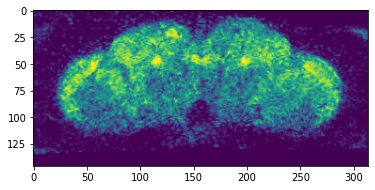

In [14]:
plt.imshow(processed_image_array[:,:,20,0].T)

In [ ]:
### DONE ###

In [ ]:
# Save the result to .h5
save_file = 'functional_channel_2_moco_zscore_highpass_warped.h5'
with h5py.File(save_file, 'w') as h5_file:
    h5_file.create_dataset('nii_image', data=processed_image_array)


In [ ]:
def process_in_chunks(image, chunk_size, transforms):
    """
    Process an image in chunks along the fourth dimension.
    
    :param image: ANTs image to be processed.
    :param chunk_size: Number of frames in each chunk.
    :param transforms: Transformations to be applied.
    :return: Processed image.
    """
    
    # Convert image to numpy array
    image_array = image.numpy()
    
    # List to hold processed chunks
    processed_chunks = []
    
    # Process each chunk
    for start_idx in range(0, image_array.shape[3], chunk_size):
        end_idx = min(start_idx + chunk_size, image_array.shape[3])
        chunk = image_array[:, :, :, start_idx:end_idx]
        
        # Convert chunk to ANTs image
        chunk_image = ants.from_numpy(chunk)
        
        # Apply transforms
        processed_chunk_image = ants.apply_transforms(fixed, chunk_image, transforms, imagetype=3)
        
        # Append processed chunk to list
        processed_chunks.append(processed_chunk_image.numpy())
    
    # Concatenate chunks back together
    processed_image_array = np.concatenate(processed_chunks, axis=3)
    
    # Convert back to ANTs image
    processed_image = ants.from_numpy(processed_image_array)
    
    return processed_image

# Usage
chunk_size = 5  # You might need to adjust this based on available memory
processed_image = process_in_chunks(moving, chunk_size, transforms)

#Remember to adjust the chunk_size based on your available memory and test to ensure that the chunking process doesn't introduce artifacts or issues in the transformation.
#Also, consider that the chunking approach might not be optimal if there's any dependence between the "frames" in the fourth dimension.







In [ ]:
############
### Save ###
############
save_file = os.path.join(save_directory, 'functional_channel_2_moco_zscore_highpass_warped.h5')#<---------------------------------------
# Save the image data to .h5
with h5py.File(save_file, 'w') as h5_file:
    h5_file.create_dataset('nii_image', data=moco.numpy())
# nib.Nifti1Image(moco.numpy(), np.eye(4)).to_filename(save_file)

In [26]:
moving_1vol = moving[:,:,:,0]
moving_1vol = ants.from_numpy(moving_1vol)
moving_1vol.set_spacing((2.611, 2.611, 5))
moving_1vol

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 128, 49)
	 Spacing    : (2.611, 2.611, 5.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [27]:
########################
### Apply Transforms ###
########################
#quick 1 vol test
moco = ants.apply_transforms(fixed, moving_1vol, transforms)

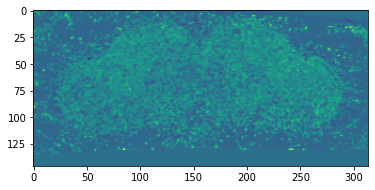

In [29]:
plt.imshow(moco[:,:,21].T)

In [ ]:
print(np.nanstd(neural[:,:,30,:]))

In [9]:
print(np.nanstd(neural[:,:,30,:]))
print(np.nansum(neural[:,:,30,:]))

0.97441494
6.484985e-05


In [11]:
os.listdir(warp_directory)

['func-to-anat.nii',
 'anat-to-meanbrain.nii',
 'anat-to-meanbrain_invtransforms_2umiso',
 'func-to-anat_invtransforms_2umiso',
 'func-to-anat_fwdtransforms_2umiso',
 'anat-to-meanbrain_fwdtransforms_2umiso']

In [14]:
dataset_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset'

In [22]:
fixed

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 128, 49)
	 Spacing    : (2.4603, 2.295, 3.7842)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [80]:
###########################
### Organize Transforms ###
###########################
#affine_path
syn_files = os.listdir(os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_2umiso'))
syn_linear_path = os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_2umiso', [x for x in syn_files if '.mat' in x][0])
syn_nonlinear_path = os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_2umiso', [x for x in syn_files if '.nii.gz' in x][0])

transforms = [syn_nonlinear_path, syn_linear_path]
#transforms = [syn_linear_path]

In [81]:
########################
### Apply Transforms ###
########################
moco = ants.apply_transforms(fixed, moving, transforms, imagetype=3)
#print(np.nanstd(stack_z))
#print(np.nansum(stack_z))

In [82]:
mean_brain = moco.numpy().mean(-1)

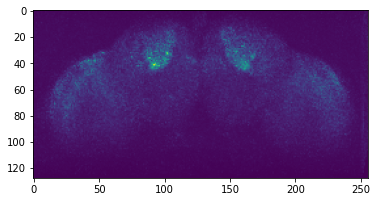

In [83]:
plt.imshow(mean_brain.std(-1).T)

In [85]:
print(np.nanstd(moco[:,:,30,:]))
print(np.nansum(moco[:,:,30,:]))

0.6635563
-0.095214844


In [17]:
nii_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_308/analysis/functional_channel_2_moco_zscore_highpass_warped.nii"
img = nib.load(nii_path)
ana_mean = img.get_fdata()

In [20]:
ana_mean.shape

(256, 128, 49, 3384)

In [22]:
print(np.nanstd(ana_mean[:,:,30,:]))
print(np.nansum(ana_mean[:,:,30,:]))

0.0
0.0


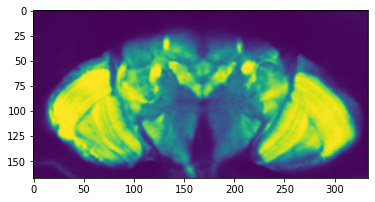

In [38]:
plt.imshow(ana_mean[:,:,50].T)

In [11]:
moco.shape

(256, 128, 49, 3384)

In [ ]:
#Good flies:
#	262: 1-trial B bar NOPE
#	287: 1-trial D bar prep done
#	299: 1-trial B bar prep done
#	308: 1-trial D bar prep done
#	309: 1-trial D bar prep done
#	311: 1-trial D bar prep done
#Aggregated flies: 
#287, 308, 309, 311: Dark Bar
#299: Bright Bar


In [10]:
func_path_287 = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_287/analysis/functional_channel_2_moco_warped.h5'

In [11]:
func_path_308 = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_308/analysis/functional_channel_2_moco_warped.h5'

In [12]:
func_path_309 = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_309/analysis/functional_channel_2_moco_warped.h5'

In [13]:
func_path_311 = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_311/analysis/functional_channel_2_moco_warped.h5'

In [14]:
# make list of paths (called fly_files)
fly_files = [func_path_287,func_path_308, func_path_309, func_path_311]

In [15]:
fly_files

['/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_287/analysis/functional_channel_2_moco_warped.h5',
 '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_308/analysis/functional_channel_2_moco_warped.h5',
 '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_309/analysis/functional_channel_2_moco_warped.h5',
 '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_311/analysis/functional_channel_2_moco_warped.h5']

In [19]:
fly_files[0]

'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_287/analysis/functional_channel_2_moco_zscore_highpass_warped.h5'

In [92]:
with h5py.File(fly_files[0], 'r') as h:
    print(list(h.keys()))
    print(h['nii_image'].shape)
    # Access the dataset
    nii_data = h['nii_image']
    print(nii_data.shape)
    meanb = np.mean(nii_data,axis = -1)
    # Choose a slice and time point

    

['nii_image']
(256, 128, 49, 3384)
(256, 128, 49, 3384)


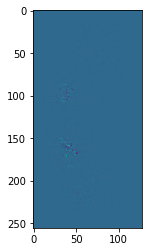

In [93]:
plt.imshow(meanb.mean(-1))

In [16]:
file_path = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/no_zscored/aggregated_fly/"

In [17]:
#######################
### Load Neural Data###
#######################

for z in range(91): ### RERUNN WITH 91 Z!!! (not 49)
    single_z = []
    for file in fly_files:
        #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
        with h5py.File(file, 'r') as h:
            print(h['nii_image'].shape)
            neural_one_z = h['nii_image'][:,:,z,:]
        
        single_z.append(neural_one_z)
    single_z = np.asarray(single_z)
    np.save(file_path + "stack" + str(z)+ ".npy", single_z)
    #save "single_z #save as numpy array
    #shape (5,x,y,t)
        
#GOAL: ONE DIRECTORY THAT CONTAINS 49 FILES (.NPY), (4,256,128,3384)


(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91, 3384)
(314, 146, 91

In [11]:
directory = '/oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly'  # replace with the path to your directory containing the files
# This will match filenames like 'stack_0.npy', 'stack_1.npy', 'stack_123.npy', etc.
file_list = [os.path.join(directory, f) for f in os.listdir(directory) 
             if re.match(r'stack\d+.npy', f)]
# Initialize an array to store the cumulative sum of averaged data
cumulative_avg = np.zeros((4, 314, 146, 91))

#print(file_list)

NameError: name 're' is not defined

In [9]:
for file in file_list:
    data = np.load(file)
    print(f"Shape of {file}: {data.shape}")

Shape of /oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/stack5.npy: (4, 256, 128, 3384)
Shape of /oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/stack22.npy: (4, 256, 128, 3384)
Shape of /oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/stack38.npy: (4, 256, 128, 3384)
Shape of /oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/stack30.npy: (4, 256, 128, 3384)
Shape of /oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/stack29.npy: (4, 256, 128, 3384)
Shape of /oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/stack12.npy: (4, 256, 128, 3384)
Shape of /oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/stack26.npy: (4, 256, 128, 3384)
Shape of /oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/stack11.npy: (4, 256, 128, 3384)
Shape of /oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggre

In [10]:
for file in fly_files:
    for file in file_list:
        data = np.load(file) # data shape: (4, 256, 128, 49, 3384)
    
    # Average along the last axis while keeping dimensions intact
    avg_data = np.mean(data, axis=-1, keepdims=True).squeeze()  # The squeeze() will remove the last axis, giving shape (4, 256, 128, 49)
    
    #cumulative_avg += avg_data

# Calculate the overall average
#overall_avg = cumulative_avg / len(file_list)

In [12]:
fly_files

NameError: name 'fly_files' is not defined

In [11]:
index = 0  # 0 to 3
slice_num = 24  # 0 to 48, for the 25th slice

plt.imshow(avg_data[index, :, :, slice_num], cmap='gray')
plt.colorbar()
plt.title(f'Index {index}, Slice {slice_num + 1}')
plt.show()

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Display slices 10, 15, 20, ... 40
for i, ax in enumerate(axes.ravel()):
    ax.imshow(overall_avg[:, :, 10 + 5 * i], cmap='gray')
    ax.set_title(f'Slice {10 + 5 * i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
mport numpy as np
import os
import matplotlib.pyplot as plt

# Assuming you have the 'overall_avg' array already from the previous code

# Display one slice, e.g., the 25th slice:
plt.imshow(overall_avg[:, :, 24], cmap='gray')
plt.colorbar()
plt.title('Slice 25')
plt.show()


In [7]:
import re

In [ ]:
single_z = []
for file in fly_files:
    print(file)
    #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
    brain = ants.image_read(file)
    neural_one_z = brain[:]
    print(np.nansum(neural_one_z[:,:,20,:]))
    print(np.nansum(neural_one_z[:,:,30,:]))
    single_z.append(neural_one_z)

/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_287/analysis/functional_channel_2_moco_zscore_highpass_warped.nii
0.0
0.0
/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_308/analysis/functional_channel_2_moco_zscore_highpass_warped.nii
0.0
0.0
/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_309/analysis/functional_channel_2_moco_zscore_highpass_warped.nii
0.0


In [12]:
for z in range(49):
    stack_z = []
    for i in range(len(single_z)):
        #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
        #brain = ants.image_read(file)
        neural_one_z = single_z[i][:,:,z,:]
        stack_z.append(neural_one_z)
    stack_z = np.asarray(stack_z)
    
    print(np.nanstd(stack_z))
    
    #np.save(file_path + "stack" + str(z)+ ".npy", stack_z)
    print(z)
    #save "single_z #save as numpy array
    #shape (5,x,y,t)
        
#GOAL: ONE DIRECTORY THAT CONTAINS 49 FILES (.NPY), (3,256,128,3384)

0.0
20
0.0
21


KeyboardInterrupt: 

In [ ]:
for z in range(49):
    single_z = []
    for file in fly_files:
        #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
        brain = ants.image_read(file)
        neural_one_z = brain[:,:,z,:]
        single_z.append(neural_one_z)
    single_z = np.asarray(single_z)
    np.save(file_path, single_z)
    #save "single_z #save as numpy array
    #shape (5,x,y,t)
        
#GOAL: ONE DIRECTORY THAT CONTAINS 49 FILES (.NPY), (3,256,128,3384)

In [5]:
np.shape(aggregated_fly.npy)

NameError: name 'aggregated_fly' is not defined

In [10]:
for z in range(6):
    single_5 = []
    for file in fly_files:
        #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
        brain = ants.image_read(file)
        neural_one_5 = brain[:,:,z,:]
        single_5.append(neural_one_5)
    single_5 = np.asarray(single_5)
    np.save(file_path + 'single_5', single_5)

In [11]:
np.shape(single_5)

(4, 256, 128, 3384)

In [15]:
for z in range(11):
    for file in fly_files:
        single_10 = []
        #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
        brain = ants.image_read(file)
        neural_one_10 = brain[:,:,z,:]
        single_10.append(neural_one_10)
    single_10 = np.asarray(single_10)
    np.save(file_path, single_10)

In [24]:
fly_files

['/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_287/analysis/functional_channel_2_moco_zscore_highpass_warped.nii',
 '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_308/analysis/functional_channel_2_moco_zscore_highpass_warped.nii',
 '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_309/analysis/functional_channel_2_moco_zscore_highpass_warped.nii',
 '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_311/analysis/functional_channel_2_moco_zscore_highpass_warped.nii']

In [ ]:
for z in range(11,21):
    for file in fly_files:
        single_20 = []
        #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
        brain = ants.image_read(file)
        neural_one_20 = brain[:,:,z,:]
        single_20.append(neural_one_20)
    single_20 = np.asarray(single_20)
    np.save(file_path, single_20)

In [ ]:
for z in range(21,31):
    for file in fly_files:
        single_30 = []
        #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
        brain = ants.image_read(file)
        neural_one_30 = brain[:,:,z,:]
        single_30.append(neural_one_30)
    single_30 = np.asarray(single_30)
    np.save(file_path, single_30)

In [ ]:
for z in range(31,41):
    for file in fly_files:
        single_40 = []
        #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
        brain = ants.image_read(file)
        neural_one_40 = brain[:,:,z,:]
        single_40.append(neural_one_40)
    single_40 = np.asarray(single_40)
    np.save(file_path, single_40)

In [ ]:
for z in range(41,49):
    for file in fly_files:
        single_49 = []
        #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
        brain = ants.image_read(file)
        neural_one_49 = brain[:,:,z,:]
        single_49.append(neural_one_49)
    single_49 = np.asarray(single_49)
    np.save(file_path, single_49)

In [11]:
for file in fly_files:
    #single_z = []
    #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
    brain = ants.image_read(file)
    neural_one_0 = brain[:,:,0,:]
    #single_z.append(neural_one_0)

In [13]:
for file in fly_files:
    #single_z = []
    #neural_file_287 = os.path.join(func_path_287_0, 'functional_channel_2_moco_zscore_highpass.h5') #
    brain = ants.image_read(file)
    neural_one_1 = brain[:,:,1,:]

KeyboardInterrupt: 

In [ ]:
np.shape(neural_one_0)

In [7]:
def main(args):





    ###########################
    ### Organize Transforms ###
    ###########################
    affine_file = os.listdir(os.path.join(warp_directory, 'func-to-anat_fwdtransforms_lowres'))[0]
    affine_path = os.path.join(warp_directory, 'func-to-anat_fwdtransforms_lowres', affine_file)

    syn_files = os.listdir(os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_lowres'))
    syn_linear_path = os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_lowres', [x for x in syn_files if '.mat' in x][0])
    syn_nonlinear_path = os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_lowres', [x for x in syn_files if '.nii.gz' in x][0])

    transforms = [affine_path, syn_linear_path, syn_nonlinear_path]

    ########################
    ### Apply Transforms ###
    ########################
    moco = ants.apply_transforms(fixed, moving, transforms, imagetype=3)

    ############
    ### Save ###
    ############
    save_file = os.path.join(save_directory, 'functional_channel_2_moco_zscore_highpass_warped.nii')#<---------------------------------------
    nib.Nifti1Image(moco.numpy(), np.eye(4)).to_filename(save_file)